<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Encoding Categorical Features</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.7</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this lab exercise, first, we want to answer the question: "Is a baby's birth weight related to the mother's smoking during pregnancy?" (Daniel, 1999). We use a small dataset with 32 observations and two predictors. What is new that one of the predictors is a categorical variable, namely 'Smoker', and has only two possible values: 'yes' or 'no'. The other predictor variable is the 'Gestation', which is a continuous variable.<br>
**Note**: *The following exercise is based on the online course of PennSate Eberly College of Science: STAT 501, regression Methods (https://online.stat.psu.edu/stat501/lesson/8/8.1). <br>
The dataset can be found at https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/birthsmokers/index.txt*

In the second part of the lab exercise, we will create contingency tables between ordinal variables using a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.<br>
In the third part of the lab exercise, we will create contingency tables for nominal variables, as well as, examine the measure of association between nominal variables, respective between a nominal and a numerical variable.<br>
**Note**: *The original dataset can be downloaded from Kaggle at https://www.kaggle.com/harlfoxem/housesalesprediction.*

In the fourth part of the lab exercise, we will use the *Credit* dataset to analyze the nominal variable with more than two categories. We will also revisit the interaction between independent variables, but at this time between a numerical and a categorical variable. <br>
**Note:** *The original dataset can be downloaded from https://www.statlearning.com/resources-first-edition*.

In the last part of the lab exercise, we will check whether there is discrimination in salaries between genders.<br>
**Note:** *The original dataset can be downloaded from https://data.princeton.edu/wws509/datasets/#salary*.

### Table of contents
1. [Birth weight as a function of binary variable](#Binary)
2. [Scikit-learn LabelBinarizer, Ordinal Encoder, ColumnTransformer, and Pipeline](#Pipeline)
3. [Correlation between binary variables in King county's house prices](#BinaryCorr)
4. [Correlation between ordinal variables in King county's house prices](#OrdinalCorr)
5. [Nominal variables and one-hot encoding](#Nominal)
6. [Scikit-learn OneHotEncoder, ColumnTransformer, and Pipeline](#OneHot)
7. [Interaction between numerical and categorical variable](#Interaction)
8. [Case study: Salary discrimination](#Salary)

## 1. Birth weight as a function of binary variable <a name="Binary"></a>

Binary variables are the ones that can take only two values: "yes'/'no', 'male'/'female', etc., and are usually encoded as 0 and 1. Until now, we had only numerical (continuous) variables, so let's take a closer look at this type of variable.

As a first step, we import the required libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import os
%matplotlib inline

Then we read the dataset from the 'BirthWeight.csv' file.

In [2]:
data = pd.read_csv(os.path.join('data','BirthWeight.csv'), sep='\t')
data

,Wgt,Gest,Smoke
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes
5,2440,35,yes
6,3226,40,no
7,3301,42,yes
8,2729,37,no
9,3410,40,no


In this dataset, 
- Response (y): Birth weight (**Wgt**) in grams of baby
- Continous predictor (x1): Length of gestation (**Gest**) in weeks
- Categorical predictor (x2): Smoking status of mother (**Smoke**) (yes or no)

As the design matrix needs to contain numerical values, we need to convert the categorical variable to numerical values. A common coding scheme is to use what's called a "**zero-one-indicator variable**". Using such a variable, we code the binary predictor 'Smoke' as:
- $x^{(i)}_2=1$, if mother $i$ smokes
- $x^{(i)}_2=0$, if mother $i$ does not smoke

We also rename the columns of the dataset to have full word description.

In [3]:
data['Smoke']=(data['Smoke']=="yes").astype(int)
data.columns=['Weight','Gestation','Smoker']
data

,Weight,Gestation,Smoker
0,2940,38,1
1,3130,38,0
2,2420,36,1
3,2450,34,0
4,2760,39,1
5,2440,35,1
6,3226,40,0
7,3301,42,1
8,2729,37,0
9,3410,40,0


Let's create the scatter plot matrix to have a visual inspection of the data.

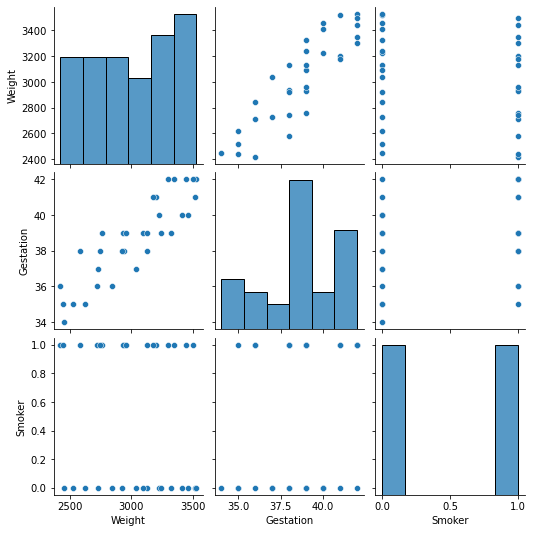

In [4]:
import seaborn as sns
sns.pairplot(data)
plt.show()

From the above plot, we can see a clear linear relationship between the weight of the newborn and the gestation period.

We can make a comparison on the result of the OLS regression:
1. OLS regression on the whole dataset without taking into account the 'Smoker' predictor
2. OLS regression on the non-smoker subset
3. OLS regression on the smoker subset

Both groups included:
~~~~~~~~~~~~~~~~~~~~~
R-squared:0.92
Intercept=-2546.138; Slope=147.207

Non-smokers group:
~~~~~~~~~~~~~~~~~~
R-squared:0.87
Intercept=-2474.564; Slope=139.029

Smokers group:
~~~~~~~~~~~~~~
R-squared:0.78
Intercept=-2037.005; Slope=130.817


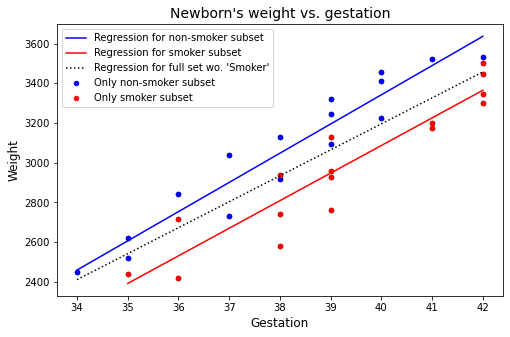

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
data.plot.scatter(x='Gestation',y='Weight',c='k',ax=ax)
data[data['Smoker']==0].plot.scatter(x='Gestation',y='Weight',c='b',ax=ax,label='Only non-smoker subset')
data[data['Smoker']==1].plot.scatter(x='Gestation',y='Weight',c='r',ax=ax,label='Only smoker subset')
linregr=LinearRegression()
x_=data[data['Smoker']==0]['Gestation'].to_numpy().reshape(-1,1)
y_=data[data['Smoker']==0]['Weight'].to_numpy().reshape(-1,1)
linregr.fit(x_,y_)
print('Both groups included:')
print('~~~~~~~~~~~~~~~~~~~~~')
print("R-squared:%1.2f"%linregr.score(x_,y_))
print("Intercept=%5.3f; Slope=%5.3f"%(linregr.intercept_,linregr.coef_[0]))
ax.plot([x_.min(),x_.max()],linregr.predict(np.array([[x_.min()],[x_.max()]])),c='b',label="Regression for non-smoker subset")
x_=data[data['Smoker']==1]['Gestation'].to_numpy().reshape(-1,1)
y_=data[data['Smoker']==1]['Weight'].to_numpy().reshape(-1,1)
linregr.fit(x_,y_)
print()
print('Non-smokers group:')
print('~~~~~~~~~~~~~~~~~~')
print("R-squared:%1.2f"%linregr.score(x_,y_))
print("Intercept=%5.3f; Slope=%5.3f"%(linregr.intercept_,linregr.coef_[0]))
ax.plot([x_.min(),x_.max()],linregr.predict(np.array([[x_.min()],[x_.max()]])),c='r',label="Regression for smoker subset")
x_=data['Gestation'].to_numpy().reshape(-1,1)
y_=data['Weight'].to_numpy().reshape(-1,1)
linregr.fit(x_,y_)
print()
print('Smokers group:')
print('~~~~~~~~~~~~~~')
print("R-squared:%1.2f"%linregr.score(x_,y_))
print("Intercept=%5.3f; Slope=%5.3f"%(linregr.intercept_,linregr.coef_[0]))
ax.plot([x_.min(),x_.max()],linregr.predict(np.array([[x_.min()],[x_.max()]])),'k:',\
        label="Regression for full set wo. 'Smoker'")
plt.title("Newborn's weight vs. gestation",fontsize=14)
plt.xlabel("Gestation",fontsize=12)
plt.ylabel("Weight",fontsize=12)
plt.legend()
plt.show()

Let's do the OLS regression again for these three cases using the *statsmodels* library to have a full picture.

In [6]:
model = ols(formula = 'Weight ~ Gestation', data=data[data['Smoker']==0]).fit()
print(model.summary(title="OLS results for the partial dataset (Non-smoking mothers)"))
print("\nRMSE =",np.sqrt(model.mse_resid))
print()
model = ols(formula = 'Weight ~ Gestation', data=data[data['Smoker']==1]).fit()
print(model.summary(title="OLS results for the partial dataset (Smoking mothers)"))
print("\nRMSE =",np.sqrt(model.mse_resid))
print()
model = ols(formula = 'Weight ~ Gestation', data=data).fit()
print(model.summary(title="OLS results for the whole dataset omitting the 'Smoking' predictor"))
print("\nRMSE =",np.sqrt(model.mse_resid))

          OLS results for the partial dataset (Non-smoking mothers)           
Dep. Variable:                 Weight   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           6.85e-09
Time:                        15:22:47   Log-Likelihood:                -96.390
No. Observations:                  16   AIC:                             196.8
Df Residuals:                      14   BIC:                             198.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2546.1379    457.293     -5.568      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the above OLS results, it is clear that the SLR is better when using subsets of the dataset than using the whole set without the binary variable.

Now, fit the linear regression model using both predictors.

In [7]:
linregr=LinearRegression()
X=data[['Gestation','Smoker']].to_numpy()
y_=data['Weight'].to_numpy().reshape(-1,1)
linregr.fit(X,y_)
print("R-squared:%1.2f"%linregr.score(X,y_))
print("Intercept=%5.3f; Coef_1=%5.3f; Coef_2=%5.3f"%(linregr.intercept_,linregr.coef_[0][0],linregr.coef_[0][1]))

R-squared:0.90
Intercept=-2389.573; Coef_1=143.100; Coef_2=-244.544


We may use the OLS results from the *statsmodels* library again:

In [8]:
model = ols(formula = 'Weight ~ Gestation + Smoker', data=data).fit()
print(model.summary(title="OLS results including the 'Smoking' predictor"))
print("\nRMSE =",np.sqrt(model.mse_resid))

                OLS results including the 'Smoking' predictor                 
Dep. Variable:                 Weight   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           5.29e-15
Time:                        15:22:47   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2389.5729    349.206     -6.843      0.0

The binary variable may be encoded in the other way, that is, setting 1 for 'Non-smoker' and 0 for 'Smoker'. For this, we may create another input variable as the inverse of the existing one.

In [9]:
data['NonSmoker']=1-data['Smoker'] # New encoding as the inverse of the existing one
data

,Weight,Gestation,Smoker,NonSmoker
0,2940,38,1,0
1,3130,38,0,1
2,2420,36,1,0
3,2450,34,0,1
4,2760,39,1,0
5,2440,35,1,0
6,3226,40,0,1
7,3301,42,1,0
8,2729,37,0,1
9,3410,40,0,1


However, this will not affect the result, only the interpretation, because the sign of the coefficient for the binary variable will be reversed.

**Note**: *The intercept is also changed slightly, however, the intercept does not have a meaning as no zero gestation period is possible.*

In [10]:

model = ols(formula = 'Weight ~ Gestation + NonSmoker', data=data).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           5.29e-15
Time:                        15:22:47   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2634.1170    358.872     -7.340      0.0

We can plot the two estimated regression lines based on the whole dataset using both predictors.

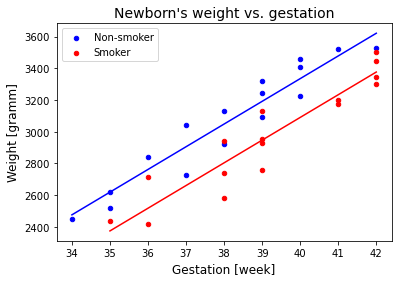

In [11]:
fig, ax = plt.subplots(1, 1)#, figsize=(7, 5))
x_min=X[np.where(X[:,1]==0)[0],0].min()
x_max=X[np.where(X[:,1]==0)[0],0].max()
data[data['Smoker']==0].plot.scatter(x='Gestation',y='Weight',c='b',ax=ax,label='Non-smoker')
data[data['Smoker']==1].plot.scatter(x='Gestation',y='Weight',c='r',ax=ax,label='Smoker')
ax.plot([x_min,x_max],linregr.predict(np.array([[x_min,0],[x_max,0]])),c='b')
x_min=X[np.where(X[:,1]==1)[0],0].min()
x_max=X[np.where(X[:,1]==1)[0],0].max()
ax.plot([x_min,x_max],linregr.predict(np.array([[x_min,1],[x_max,1]])),c='r')
plt.xlabel("Gestation [week]",fontsize=12)
plt.ylabel("Weight [gramm]",fontsize=12)
plt.title("Newborn's weight vs. gestation",fontsize=14)
plt.show()

With two continuous predictors, the output of the linear regression model is a plane in three dimensions. When one of the predictors is a binary variable, instead of a plane, two parallel lines are obtained as the output of the regression model. However, these two parallel lines also define a plane, but the output values are limited only to these two parallel lines of that plane.

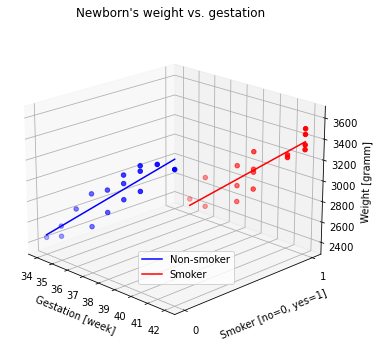

In [12]:
from mpl_toolkits import mplot3d
ax3d=plt.figure(figsize=(8,6)).gca(projection='3d')
x_min=X[np.where(X[:,1]==0)[0],0].min()
x_max=X[np.where(X[:,1]==0)[0],0].max()
ax3d.scatter(data[data['Smoker']==0]['Gestation'],data[data['Smoker']==0]['Smoker'],data[data['Smoker']==0]['Weight'],c='b')
ax3d.plot([x_min,x_max],[0,0],linregr.predict(np.array([[x_min,0],[x_max,0]])).flatten(), zdir='z',c='b',label='Non-smoker') 
x_min=X[np.where(X[:,1]==1)[0],0].min()
x_max=X[np.where(X[:,1]==1)[0],0].max()
ax3d.scatter(data[data['Smoker']==1]['Gestation'],data[data['Smoker']==1]['Smoker'],data[data['Smoker']==1]['Weight'],c='r')
ax3d.plot([x_min,x_max],[1,1],linregr.predict(np.array([[x_min,1],[x_max,1]])).flatten(), zdir='z',c='r',label='Smoker')
ax3d.view_init(elev=20., azim=-45) 
ax3d.set_yticks([0, 1])
plt.legend(loc=(0.4,0.2))
ax3d.set_xlabel("Gestation [week]")
ax3d.set_ylabel("Smoker [no=0, yes=1]")
ax3d.set_zlabel("Weight [gramm]")
#ax3d.zaxis.set_rotate_label(False) 
plt.title("Newborn's weight vs. gestation")
plt.show()

Let's calculate the mean and standard deviation of the 'Smoker' predictor using the formulas derived in the book.

In [13]:
N0=(data['Smoker']==0).sum()
N1=(data['Smoker']==1).sum()
N,_=data.shape
x2_mean=N1/N
print("Mean of the 'Smoker' predictor:",x2_mean)
x2_std=np.sqrt((N0*(0-x2_mean)**2+N1*(1-x2_mean)**2)/(N-1))
x2_std
print("Standard deviation of the 'Smoker' predictor:",x2_std)

Mean of the 'Smoker' predictor: 0.5
Standard deviation of the 'Smoker' predictor: 0.508000508000762


The same results can be obtained using the *mean* and *std* functions of the *pandas* library.

In [14]:
print("Mean of the 'Smoker' predictor:",data['Smoker'].mean())
print("Standard deviation of the 'Smoker' predictor:",data['Smoker'].std(ddof=1))

Mean of the 'Smoker' predictor: 0.5
Standard deviation of the 'Smoker' predictor: 0.508000508000762


The correlation coefficient between the binary predictor and response variable can be calculated with the formula derived in the book:

In [15]:
mu0=data[data['Smoker']==0].Weight.mean()
mu1=data[data['Smoker']==1].Weight.mean()
Sy=data['Weight'].std(ddof=1)
r=(mu1-mu0)/Sy*np.sqrt(N0*N1/N**2)
print("Point-biserial correlation coefficient between response and predictor:",r)

Point-biserial correlation coefficient between response and predictor: -0.13322980291045047


The same result is obtained using the *corrcoef* method of NumPy.

In [16]:
np.corrcoef(data['Weight'],data['Smoker'])

array([[ 1.        , -0.13536162],
       [-0.13536162,  1.        ]])

## 2. Scikit-learn LabelBinarizer, Ordinal Encoder, ColumnTransformer, and Pipeline <a name="Pipeline"></a>

We can use the *scikit-learn* library for converting to 'Smoker' binary variable to a zero-one-indicator variable:

In [17]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
data = pd.read_csv(os.path.join('data','BirthWeight.csv'), sep='\t')
N,_=data.shape
data.columns=['Weight','Gestation','Smoker']
lb.fit_transform(data['Smoker'])

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

We can check the label of the classes (unique values of the binary variable) with the following attribute:

In [18]:
lb.classes_

array(['no', 'yes'], dtype='<U3')

Then we can use the *scikit-learn* library linear regression model to fit the transformed data.

In [19]:
X=np.zeros((N,2))
X[:,0]=data['Gestation']
X[:,1]=np.ravel(lb.fit_transform(data['Smoker']))
y=data['Weight']
from sklearn.linear_model import LinearRegression
linregr=LinearRegression()
linregr.fit(X,y)
print('Intercept:',linregr.intercept_)
print('Regr. coefficients:',linregr.coef_)

Intercept: -2389.5729126024207
Regr. coefficients: [ 143.10027312 -244.54404019]


With the *inverse_transform*, we can back transform the zero-one-indicator variable to the original class labels.

In [20]:
lb.inverse_transform(X[:,1])

array(['yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes',
       'yes', 'no'], dtype='<U3')

The *LabelBinarizer* uses the *unique_labels* method during zero-to-one indicator variable encoding. That will return an ordered list of unique labels, which defines what label will be encoded as 0 and what label as 1 (i.e., first will be encoded as 0).

In [21]:
from sklearn.utils.multiclass import unique_labels
print(unique_labels(['male','female','male','female','male']))
print(unique_labels(['yes','yes','no','no']))
print(unique_labels(['positive','negative','negative','positive']))
print(unique_labels([+1,-1,+1,-1]))
print(unique_labels([1,5,1,5]))

['female' 'male']
['no' 'yes']
['negative' 'positive']
[-1  1]
[1 5]


So far, so good. But we may use pipelining to make the conversion and fitting and even predicting in one step. As a first step, we may create a column transformer, a preprocessor that can apply different preprocessing techniques to each feature. Because the LabelBinerizer does not follow the fit and transform attribute signature, i.e., to pass both X and y, we should create our class that will fill this gap. As a first attempt, passthrough all variables that are not transformed (including the output variable).

**Note:** *To make our life easier, our MyLabelBinarizer will be the child class of BaseEstimator and TransformerMixin base classes of the scikit-learn library.*

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin,BaseEstimator

class MyLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelBinarizer()
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

mylb=MyLabelBinarizer()
ct = ColumnTransformer(transformers=[('binarizer',mylb,['Smoker'])],remainder='passthrough')
ct.fit_transform(data)

array([[   1, 2940,   38],
       [   0, 3130,   38],
       [   1, 2420,   36],
       [   0, 2450,   34],
       [   1, 2760,   39],
       [   1, 2440,   35],
       [   0, 3226,   40],
       [   1, 3301,   42],
       [   0, 2729,   37],
       [   0, 3410,   40],
       [   1, 2715,   36],
       [   0, 3095,   39],
       [   1, 3130,   39],
       [   0, 3244,   39],
       [   0, 2520,   35],
       [   1, 2928,   39],
       [   0, 3523,   41],
       [   1, 3446,   42],
       [   0, 2920,   38],
       [   1, 2957,   39],
       [   0, 3530,   42],
       [   1, 2580,   38],
       [   0, 3040,   37],
       [   1, 3500,   42],
       [   1, 3200,   41],
       [   0, 3322,   39],
       [   0, 3459,   40],
       [   1, 3346,   42],
       [   0, 2619,   35],
       [   1, 3175,   41],
       [   1, 2740,   38],
       [   0, 2841,   36]], dtype=int64)

We may get rid of the output variable if we do not pass it to the transformer. However, the order of the features is changed. We can remediate this by creating another class without making any transformation. With that, features without a transformation assigned will be dropped (like the output variable).

In [23]:
class NoTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X

mylb=MyLabelBinarizer()
notransf=NoTransformer()
ct = ColumnTransformer(transformers=[('notransf',notransf,['Gestation']),\
                                     ('binarizer',mylb,['Smoker'])])
ct.fit_transform(data)

array([[38,  1],
       [38,  0],
       [36,  1],
       [34,  0],
       [39,  1],
       [35,  1],
       [40,  0],
       [42,  1],
       [37,  0],
       [40,  0],
       [36,  1],
       [39,  0],
       [39,  1],
       [39,  0],
       [35,  0],
       [39,  1],
       [41,  0],
       [42,  1],
       [38,  0],
       [39,  1],
       [42,  0],
       [38,  1],
       [37,  0],
       [42,  1],
       [41,  1],
       [39,  0],
       [40,  0],
       [42,  1],
       [35,  0],
       [41,  1],
       [38,  1],
       [36,  0]], dtype=int64)

Next, we will create a pipeline from the data preprocessing and linear regression. With the pipeline, we can create a single instance that will encode the binary variable, fit the linear regression model, respectively make a prediction.

In [24]:
from sklearn.pipeline import Pipeline

pipe=Pipeline(steps=[('preproc',ct),('regr',linregr)])
pipe.fit(data,data['Weight'])

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('notransf', NoTransformer(),
                                                  ['Gestation']),
                                                 ('binarizer',
                                                  MyLabelBinarizer(),
                                                  ['Smoker'])])),
                ('regr', LinearRegression())])

With the following setting, the pipeline will be presented graphically.

In [25]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('notransf', NoTransformer(),
                                                  ['Gestation']),
                                                 ('binarizer',
                                                  MyLabelBinarizer(),
                                                  ['Smoker'])])),
                ('regr', LinearRegression())])

Then you can access the attributes of the linear regression model through the pipeline instance in the following way.

In [26]:
print('Intercept:',pipe['regr'].intercept_)
print('Regr. coefficients:',pipe['regr'].coef_)

Intercept: -2389.5729126024207
Regr. coefficients: [ 143.10027312 -244.54404019]


You can also predict with the pipeline easily.

In [27]:
pipe.predict(data)

array([2803.69342567, 3048.23746586, 2517.49287944, 2475.83637339,
       2946.79369879, 2374.39260632, 3334.4380121 , 3376.09451814,
       2905.13719274, 3334.4380121 , 2517.49287944, 3191.33773898,
       2946.79369879, 3191.33773898, 2618.93664651, 2946.79369879,
       3477.53828521, 3376.09451814, 3048.23746586, 2946.79369879,
       3620.63855833, 2803.69342567, 2905.13719274, 3376.09451814,
       3232.99424503, 3191.33773898, 3334.4380121 , 3376.09451814,
       2618.93664651, 3232.99424503, 2803.69342567, 2762.03691963])

So far, so good. However, there is still a problem with the above mylabelbinerizer. Even if we did a workaround to remove the requirement to handle 'y', it still has the limitation that LabelEncoder() cannot take 2D array (basically multiple features at a time) because it takes only 1D values.

Instead, we should use the more general OrdinalEncoder.

In [28]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
encoder.fit_transform(np.array(data['Smoker']).reshape(-1, 1))
encoder.categories_

[array(['no', 'yes'], dtype=object)]

As can be seen, the *labelencoder* requires always a 2D shape input. Thus, if we had only one feature, we should convert it to a column vector (2D shape array).

In [29]:
ct = ColumnTransformer(transformers=[('notransf',notransf,['Gestation']),\
                                     ('binarizer',encoder,['Smoker'])])
ct.fit_transform(data)

array([[38.,  1.],
       [38.,  0.],
       [36.,  1.],
       [34.,  0.],
       [39.,  1.],
       [35.,  1.],
       [40.,  0.],
       [42.,  1.],
       [37.,  0.],
       [40.,  0.],
       [36.,  1.],
       [39.,  0.],
       [39.,  1.],
       [39.,  0.],
       [35.,  0.],
       [39.,  1.],
       [41.,  0.],
       [42.,  1.],
       [38.,  0.],
       [39.,  1.],
       [42.,  0.],
       [38.,  1.],
       [37.,  0.],
       [42.,  1.],
       [41.,  1.],
       [39.,  0.],
       [40.,  0.],
       [42.,  1.],
       [35.,  0.],
       [41.,  1.],
       [38.,  1.],
       [36.,  0.]])

Then we can redefine our pipeline, but at this time with the new binary variable encoder.

In [30]:
pipe=Pipeline(steps=[('preproc',ct),('regr',linregr)])
pipe.fit(data,data['Weight'])

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('notransf', NoTransformer(),
                                                  ['Gestation']),
                                                 ('binarizer', OrdinalEncoder(),
                                                  ['Smoker'])])),
                ('regr', LinearRegression())])

to obtain the same result.

In [31]:
print('Intercept:',pipe['regr'].intercept_)
print('Regr. coefficients:',pipe['regr'].coef_)

Intercept: -2389.5729126024207
Regr. coefficients: [ 143.10027312 -244.54404019]


## 3. Correlation between binary variables in King county's house prices <a name="BinaryCorr"></a>

In what follows, we will investigate the correlation between two binary variables, respective between a numerical and a binary variable.

As a first step, read the HouseSalesKingCounty.csv file into a pandas dataframe and print out the first five rows of the dataset.

**Note:** *In this lab exercise, we will focus only on the correlation between binary variables.*

In [32]:
data = pd.read_csv('data\HouseSalesKingCounty.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Columns of the dataset:**
- **id** - A unique ID for each house sold
- **date** - The date of the home sale
- **price** - Price of each home sold (is the prediction target)
- **bedrooms** - Number of Bedrooms/House
- **bathrooms** - Number of bathrooms/House, where 0.5 accounts for a room with a toilet but no shower
- **sqft_living** - Square footage of the apartments interior living space
- **sqft_lot** - Square footage of the land space
- **floors** - Number of floors (levels) in the house
- **waterfront** - A binary variable for whether the house has a view to a waterfront or not
- **view** - An index from 0 to 4 of how good the view of the property was
- **condition** - An index from 1 to 5 on the condition of the apartment (the higher, the better)
- **grade** - the overall grade given to the housing unit, based on the King County grading system (the higher, the better) 
- **sqft_above** - Square footage of house apart from the basement (above ground level)
- **sqft_basement** - Square footage of the basement (below ground level)
- **yr_built** - The year the house was initially built
- **yr_renovated** - The year of the house's last renovation
- **zipcode** - What zip code area the house is in
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space of the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

For the sake of this exercise, in the following line, a new binary variable will be created, indicating whether the house sold was renovated (=1) or not (=0). We will also print out the percentage of renovated houses.

In [33]:
data['renovated']=data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
print("Percentage of houses renovated: {:1.2f}%".format(data['renovated'].mean()*100))

Percentage of houses renovated: 4.23%


Waterfront is already a binary variable (yes=1 or no=0). We can check this, as well as the proportion of houses sold on the waterfront.

In [34]:
print("Unique values for waterfront:",data['waterfront'].unique())
print("Percentage of houses with waterfront: {:1.2f}%".format(data['waterfront'].mean()*100))

Unique values for waterfront: [0 1]
Percentage of houses with waterfront: 0.75%


### Contingency table for binary variables

Let's create the contingency table (also called crosstab) of these two binary variables using the *pandas* library:

In [35]:
crosstab=pd.crosstab(data['renovated'],data['waterfront'],margins=True)
crosstab

waterfront,0,1,All
renovated,,,
0,20578,121,20699
1,872,42,914
All,21450,163,21613


The last row in the above table represents the marginal frequencies of 'waterfront', while the last column the marginal frequencies of the 'renovated' binary variable. The total number of observations is at the right bottom of the table.

Let's check the Phi coefficient, as a special case of Pearson correlation coefficient, of these two binary variables using the formula derived in the book. For this, we store the frequencies from the contingency table into a matrix, so the Python coding would be simpler.

In [36]:
C=np.array(pd.crosstab(data['renovated'],data['waterfront']))
(C[0,0]*C[1,1]-C[1,0]*C[0,1])/np.sqrt(np.prod(C.sum(axis=0))*np.prod(C.sum(axis=1)))

0.09329352156178566

The same result can be obtained with the *corr* function of the pandas library.

In [37]:
data[['renovated','waterfront']].corr()

,renovated,waterfront
renovated,1.000000,0.093294
waterfront,0.093294,1.000000


You may also get the contingency table using *scikit-learn* library.

In [38]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(data['renovated'],data['waterfront'])

array([[20578,   121],
       [  872,    42]])

The marginal distribution of 'waterfront' can be calculated by summing the elements in each column:

In [39]:
contingency_matrix(data['renovated'],data['waterfront']).sum(axis=0)

array([21450,   163])

The marginal distribution of 'renovated' can be calculated by summing the elements in each row:

In [40]:
contingency_matrix(data['renovated'],data['waterfront']).sum(axis=1)[:,np.newaxis]

array([[20699],
       [  914]])

According to the independence assumption, the expected values are:

In [41]:
r=C.sum(axis=0) # marginal distribution waterfront
c=C.sum(axis=1) # marginal distribution renovated
E=np.array([[c[i]*r[j]/C.sum() for j in range(2)] for i in range(2)])
print(E)

[[2.05428932e+04 1.56106834e+02]
 [9.07106834e+02 6.89316615e+00]]


and the $\chi^2$ test is

In [42]:
from scipy.stats import chi2
chi2_test=((C-E)**2/E).sum()
print("Chi-squared test =",chi2_test)
print("p-value =",chi2.sf(chi2_test,1))

Chi-squared test = 188.11266102777645
p-value = 8.20931520349653e-43


Thus, we can reject the statistical independence. 

We can also use the *scipy* library to calculate everything at once.

In [43]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data['renovated'],data['waterfront']).to_numpy(),correction=False)

(188.11266102777645,
 8.20931520349653e-43,
 1,
 array([[2.05428932e+04, 1.56106834e+02],
        [9.07106834e+02, 6.89316615e+00]]))

In the above printout, the first element is the value of the $\chi^2$ test statistic, the second is the p-value, the third the number of freedom, and the last is the expected frequencies. Because the p-value is zero, we can reject the null hypothesis of statistical independence. That should not be a surprise as the Pearson correlation was not zero either.

### Cramer's V

While we can reject the statistical independence between the two binary variables, the association between them might be weak.

Let's define the function as formulated in the book:

In [44]:
def CramersV(a,b):
    crosstab=pd.crosstab(a,b).to_numpy()
    r,c=crosstab.shape
    N=crosstab.sum()
    phi2=chi2_contingency(crosstab,correction=False)[0]/N
    return np.sqrt(phi2/min(r-1,c-1))

Let's check Cramer's V to see how strong the association between the two binary variables is:

In [45]:
print("Cramer's V =",CramersV(data['renovated'],data['waterfront']))

Cramer's V = 0.09329352156178565


That is again equal to the phi coefficient calculated above, and thus with the Pearson correlation coefficient.

In [46]:
data[['waterfront','renovated']].corr(method='pearson')

,waterfront,renovated
waterfront,1.000000,0.093294
renovated,0.093294,1.000000


### Correlation between a binary and a numerical variable

We can check the correlation between the binary variable and response variable, called the point-biserial correlation coefficient. For example, the point-biserial correlation between independent variable 'waterfront' and dependent variable 'price' is:

In [47]:
data[['waterfront','price']].corr(method='pearson')

,waterfront,price
waterfront,1.000000,0.266369
price,0.266369,1.000000


Similarly we have the point-biserial correlation between independent variable 'renovated' and dependent variable 'price':

In [48]:
data[['renovated','price']].corr(method='pearson')

,renovated,price
renovated,1.000000,0.126092
price,0.126092,1.000000


The same result is obtained if we use the *pointbiserialr* function of *scipy* library:

In [49]:
from scipy.stats import pointbiserialr
print("Point-biserial correlation between 'waterfront' and 'price' is:",pointbiserialr(data['waterfront'],data['price'])[0])
print("Point-biserial correlation between 'renovated' and 'price' is:",pointbiserialr(data['renovated'],data['price'])[0])

Point-biserial correlation between 'waterfront' and 'price' is: 0.2663694343708203
Point-biserial correlation between 'renovated' and 'price' is: 0.12609226343484364


Because binary variables can be seen as a special case of the ordinal variables, the Spearman correlation coefficient can be also defined. For example, the Spearman correlation coefficient between independent variable 'waterfront' and dependent variable 'price' is:

In [50]:
from scipy.stats import spearmanr
spearmanr(data['waterfront'],data['price'])

SpearmanrResult(correlation=0.11508923741268269, pvalue=1.2546502655812345e-64)

This can be obtained with the Pearson correlation coefficient after the binary variables are ranked.

In [51]:
from scipy.stats import rankdata
np.corrcoef(rankdata(data['price'],method='average'),rankdata(data['waterfront'],method='average'))

array([[1.        , 0.11508924],
       [0.11508924, 1.        ]])

Spearman correlation coefficient can be also calculated with *pandas* library.

In [52]:
data[['waterfront','price']].corr(method='spearman')

,waterfront,price
waterfront,1.000000,0.115089
price,0.115089,1.000000


Similarly, the Spearman correlation coefficient between independent variable 'renovated' and dependent variable 'price' is:

In [53]:
data[['renovated','price']].corr(method='spearman')

,renovated,price
renovated,1.000000,0.101026
price,0.101026,1.000000


In case the nominal variable is dichotomous, i.e., it has only two unique values, the rank-biserial correlation can be used to check for association with on ordinal (ranked) data. Let's consider the 'waterfront' and'renovated' binary variables as nominal.  For example, if we want to find out the association between waterfront and price, first we rank the price numerical variable using *scipy* statistical library, then calculate the mean of the two groups (mean of price for houses without waterfront view and mean of price for houses with waterfront view). 

Let's define the function according to the formual from the book:

In [54]:
def rankbiserialr(binary,numerical):
    cat_enc=pd.factorize(binary)
    rank=rankdata(numerical,method='ordinal')
    mask0=np.argwhere(np.array(cat_enc[0]==0)).flatten()
    mask1=np.argwhere(np.array(cat_enc[0]==1)).flatten()
    y0=rank[mask0].mean()
    y1=rank[mask1].mean()
    N=np.array(numerical).flatten().shape
    return float((2*(y1-y0)/N))

Then using this function the rank-biserial correlation coefficients are:

In [55]:
print("Rank-biserial correlation between 'waterfront' and 'price' is:",rankbiserialr(data['waterfront'],data['price']))
print("Rank-biserial correlation between 'renovated' and 'price' is:",rankbiserialr(data['renovated'],data['price']))

Rank-biserial correlation between 'waterfront' and 'price' is: 0.7680787106553979
Rank-biserial correlation between 'renovated' and 'price' is: 0.28970616980302116


As can be seen, the rank-biserial correlation coefficient is much higher compared to Pearson's and Spearman's correlations coefficient.

## 4. Correlation between ordinal variables in King county's house prices <a name="OrdinalCorr"></a>

Because *View*, *Condition*, and *Grade* predictors from the *King County House Sales* dataset have a natural order and can be assumed that they act as interval variables, there is no need for additional encoding.

### Histograms of ordinal variables

Let's create the histogram of the *view* variable.

[0 1 2 3 4]


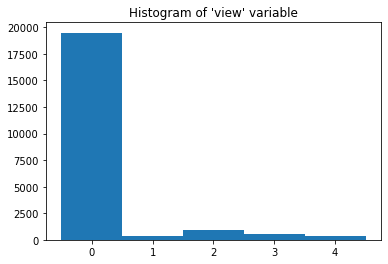

In [56]:
print(np.sort(data['view'].unique()))
plt.hist(data['view'],bins=np.arange(data['view'].nunique()+1) - 0.5)
plt.title("Histogram of 'view' variable")
plt.show()

as well as the histogram of the *condition* variable

[1 2 3 4 5]


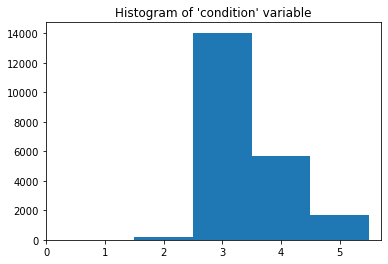

In [57]:
print(np.sort(data['condition'].unique()))
plt.hist(data['condition'],bins=np.arange(1,data['condition'].nunique()+1) + 0.5)
plt.xticks([0, 1, 2, 3, 4, 5])
plt.title("Histogram of 'condition' variable")
plt.show()

and finally, the histogram of the *grade* variable.

[ 1  3  4  5  6  7  8  9 10 11 12 13]


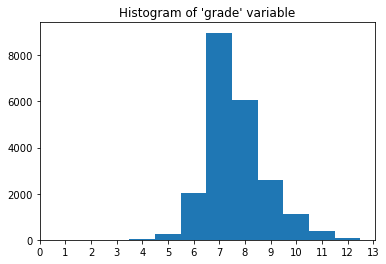

In [58]:
print(np.sort(data['grade'].unique()))
plt.hist(data['grade'],bins=np.arange(1,data['grade'].nunique()+1) + 0.5)
plt.xticks(range(14))
plt.title("Histogram of 'grade' variable")
plt.show()

With the assumption that the intervals between the unique values of 'view', 'condition', and 'grade' variables are equal, these ordinal variables may be also considered as interval variables.

We may also calculate statistics like mean and standard deviation:

In [59]:
print("\nStatistics for the 'view' ordinal variable:")
print("---------------------------------------------")
print("Mean:",data['view'].mean())
print("Standard deviation:",data['view'].std())
print("\nStatistics for the 'condition' ordinal variable:")
print("--------------------------------------------------")
print("Mean:",data['condition'].mean())
print("Standard deviation:",data['condition'].std())
print("\nStatistics for the 'grade' ordinal variable:")
print("----------------------------------------------")
print("Mean:",data['grade'].mean())
print("Standard deviation:",data['grade'].std())


Statistics for the 'view' ordinal variable:
---------------------------------------------
Mean: 0.23430342849211122
Standard deviation: 0.7663175692736397

Statistics for the 'condition' ordinal variable:
--------------------------------------------------
Mean: 3.4094295100171195
Standard deviation: 0.6507430463662665

Statistics for the 'grade' ordinal variable:
----------------------------------------------
Mean: 7.656873178179799
Standard deviation: 1.1754587569743042


### Contingency tables for ordinal variables

As a next step, let's create the contingency table (also called crosstab) between the two ordinal variables *view* and *condition* using *pandas* library:

In [60]:
pd.crosstab(data['view'],data['condition'],margins=True)

condition,1,2,3,4,5,All
view,,,,,,
0,27,166,12768,5054,1474,19489
1,1,1,191,105,34,332
2,0,3,588,268,104,963
3,0,2,309,153,46,510
4,2,0,175,99,43,319
All,30,172,14031,5679,1701,21613


Then test the statistical independence between them using the *scipy* library:

In [61]:
chi2_test=chi2_contingency(pd.crosstab(data['view'],data['condition']).to_numpy())
chi2_test

(68.50224408217254,
 1.822893843270391e-08,
 16,
 array([[2.70517744e+01, 1.55096840e+02, 1.26521149e+04, 5.12090089e+03,
         1.53383561e+03],
        [4.60833757e-01, 2.64211354e+00, 2.15531948e+02, 8.72358303e+01,
         2.61292740e+01],
        [1.33669551e+00, 7.66372091e+00, 6.25172489e+02, 2.53036460e+02,
         7.57906353e+01],
        [7.07907278e-01, 4.05866839e+00, 3.31088234e+02, 1.34006848e+02,
         4.01383427e+01],
        [4.42789062e-01, 2.53865729e+00, 2.07092444e+02, 8.38199695e+01,
         2.51061398e+01]]))

We can reject the null hypothesis of statistical independence.

Similarly, we can create the contingency table between ordinal variables *view* and *grade*:

In [62]:
pd.crosstab(data['view'],data['grade'],margins=True)

grade,1,3,4,5,6,7,8,9,10,11,12,13,All
view,,,,,,,,,,,,,
0,1,3,26,229,1955,8556,5412,2160,857,242,43,5,19489
1,0,0,2,2,15,94,110,63,26,18,2,0,332
2,0,0,1,6,42,222,326,189,102,59,13,3,963
3,0,0,0,1,14,78,146,130,84,45,10,2,510
4,0,0,0,4,12,31,74,73,65,35,22,3,319
All,1,3,29,242,2038,8981,6068,2615,1134,399,90,13,21613


and check the statistical independence between them:

In [63]:
chi2_test=chi2_contingency(pd.crosstab(data['view'],data['grade']).to_numpy())#,correction=False)
chi2_test

(1806.6109538493602,
 0.0,
 44,
 array([[9.01725813e-01, 2.70517744e+00, 2.61500486e+01, 2.18217647e+02,
         1.83771721e+03, 8.09839953e+03, 5.47167223e+03, 2.35801300e+03,
         1.02255707e+03, 3.59788599e+02, 8.11553232e+01, 1.17224356e+01],
        [1.53611252e-02, 4.60833757e-02, 4.45472632e-01, 3.71739231e+00,
         3.13059733e+01, 1.37958266e+02, 9.32113080e+01, 4.01693425e+01,
         1.74195160e+01, 6.12908897e+00, 1.38250127e+00, 1.99694628e-01],
        [4.45565169e-02, 1.33669551e-01, 1.29213899e+00, 1.07826771e+01,
         9.08061815e+01, 4.00162078e+02, 2.70368945e+02, 1.16515292e+02,
         5.05270902e+01, 1.77780502e+01, 4.01008652e+00, 5.79234720e-01],
        [2.35969093e-02, 7.07907278e-02, 6.84310369e-01, 5.71045204e+00,
         4.80905011e+01, 2.11923842e+02, 1.43186045e+02, 6.17059177e+01,
         2.67588951e+01, 9.41516680e+00, 2.12372183e+00, 3.06759820e-01],
        [1.47596354e-02, 4.42789062e-02, 4.28029427e-01, 3.57183177e+00,
         3.0080

Again, we can reject the null hypothesis of statistical independence.

Finally, we may create the contingency table between ordinal variables *condition* and *grade*:

In [64]:
pd.crosstab(data['condition'],data['grade'],margins=True)

grade,1,3,4,5,6,7,8,9,10,11,12,13,All
condition,,,,,,,,,,,,,
1,1,0,1,9,11,6,2,0,0,0,0,0,30
2,0,1,5,15,59,75,13,2,2,0,0,0,172
3,0,1,13,100,1035,5234,4269,2041,921,332,74,11,14031
4,0,0,10,84,685,2833,1394,446,156,56,13,2,5679
5,0,1,0,34,248,833,390,126,55,11,3,0,1701
All,1,3,29,242,2038,8981,6068,2615,1134,399,90,13,21613


respective test the statistical independence between them:

In [65]:
chi2_test=chi2_contingency(pd.crosstab(data['condition'],data['grade']).to_numpy())#,correction=False)
chi2_test

(2225.6248376517715,
 0.0,
 44,
 array([[1.38805349e-03, 4.16416046e-03, 4.02535511e-02, 3.35908944e-01,
         2.82885301e+00, 1.24661084e+01, 8.42270856e+00, 3.62975987e+00,
         1.57405265e+00, 5.53833341e-01, 1.24924814e-01, 1.80446953e-02],
        [7.95817332e-03, 2.38745200e-02, 2.30787026e-01, 1.92587794e+00,
         1.62187572e+01, 7.14723546e+01, 4.82901957e+01, 2.08106232e+01,
         9.02456855e+00, 3.17531116e+00, 7.16235599e-01, 1.03456253e-01],
        [6.49192616e-01, 1.94757785e+00, 1.88265859e+01, 1.57104613e+02,
         1.32305455e+03, 5.83039888e+03, 3.93930079e+03, 1.69763869e+03,
         7.36184426e+02, 2.59027854e+02, 5.84273354e+01, 8.43950400e+00],
        [2.62758525e-01, 7.88275575e-01, 7.61999722e+00, 6.35875630e+01,
         5.35501874e+02, 2.35983431e+03, 1.59441873e+03, 6.87113543e+02,
         2.97968167e+02, 1.04840651e+02, 2.36482672e+01, 3.41586082e+00],
        [7.87026327e-02, 2.36107898e-01, 2.28237635e+00, 1.90460371e+01,
         1.6039

Again, we can reject the null hypothesis of statistical independence.

### Cramer's V

Now, that we know that neither of the ordinal variables are statistically independent from the other, let's check the Cramer's V to see how strong the association is between these ordinal variables.

In [66]:
print("Cramer's V between 'view' and 'condition':",CramersV(data['view'],data['condition']))
print("Cramer's V between 'view' and 'grade':",CramersV(data['view'],data['grade']))
print("Cramer's V between 'grade' and 'condition':",CramersV(data['grade'],data['condition']))

Cramer's V between 'view' and 'condition': 0.02814912353868364
Cramer's V between 'view' and 'grade': 0.144558887450996
Cramer's V between 'grade' and 'condition': 0.16044953295766665


It should be noted that Cramer's V is always positive (0 for no assciation and 1 for perfect association).

Cramér's V can be a heavily biased estimator and will tend to overestimate the strength of association. A bias correction is proposed to overcome this problem. Let's define the function first with the bias correction.

In [67]:
def CramersVbiascorrection(a,b):
    crosstab=pd.crosstab(a,b).to_numpy()
    r,c=crosstab.shape
    N=crosstab.sum()
    r_corr=r-(r-1)**2/(N-1)
    c_corr=c-(c-1)**2/(N-1)
    phi2=chi2_contingency(crosstab,correction=False)[0]/N
    phi2_corr=max(0,phi2-(c-1)*(r-1)/(N-1))
    return np.sqrt(phi2_corr/min(r_corr-1,c_corr-1))

Then calculate the bias corrected Cramer's V:

In [68]:
print("Cramer's V between 'view' and 'condition':",CramersVbiascorrection(data['view'],data['condition']))
print("Cramer's V between 'view' and 'grade':",CramersVbiascorrection(data['view'],data['grade']))
print("Cramer's V between 'grade' and 'condition':",CramersVbiascorrection(data['grade'],data['condition']))

Cramer's V between 'view' and 'condition': 0.0246455516060496
Cramer's V between 'view' and 'grade': 0.1428008041256809
Cramer's V between 'grade' and 'condition': 0.1588702223951357


### Kendall's tau

Here is a suboptimal function defined for the Kendall's tau-b correlation coefficient. This function is just defined for the sake of understanding how to calculate Kendall's tau-b, respective the concordant and discordant pairs:

In [69]:
def kendalltau_suboptimal(x,y):
    Rx=rankdata(x) # Rank data with average for ties
    Ry=rankdata(y) # Rank data with average for ties
    M=np.vstack((Rx,Ry)).T
    N,_=M.shape
    SignDiff=np.sign(np.vstack([(M-M[i,:])[i+1:,:] for i in range(N-1)])) # Create the differences and use their sign only
    Nc=np.sum(SignDiff[:,0]*SignDiff[:,1]>0.0).astype(float) # Number of concordant pairs
    Nd=np.sum(SignDiff[:,0]*SignDiff[:,1]<0.0).astype(float) # Number of discordant pairs
    Nxy=np.sum(np.logical_and(SignDiff[:,0]==0,SignDiff[:,1]==0)).astype(float) # Number of tied ranks in both 
    Nx=np.sum(SignDiff[:,0]==0).astype(float)-Nxy # Number of tied ranks only in the first variable
    Ny=np.sum(SignDiff[:,1]==0).astype(float)-Nxy # Number of tied ranks only in the second variable
    No=(Nc+Nd+Nx+Ny-Nxy).astype(float) # The sum of all
    return (Nc-Nd)/np.sqrt((Nc+Nd+Nx)*(Nc+Nd+Ny)), (Nc,Nd,Nx,Ny,Nxy) # return the Kendall's tau-b as defined in the book

And here is the result between 'view' and 'condition' ordinal variables using only the first 500 observations (it would take approximately 2 minutes for the whole dataset):

In [70]:
x=np.array(data['view'])[:500]
y=np.array(data['condition'])[:500]

taub,Nvalues=kendalltau_suboptimal(x,y)
print("Kendall's tau-b:",taub)
print("Number of concordant pairs:",Nvalues[0])
print("Number of discordant pairs:",Nvalues[1])
print("Number of ties only in first variable:",Nvalues[2])
print("Number of ties only in second variable:",Nvalues[3])
print("Number of ties in both variables:",Nvalues[4])
print("N_o as the sum of all:",Nvalues[0]+Nvalues[1]+Nvalues[2]+Nvalues[3]+Nvalues[4])
print("The number of ways to choose two items from 500:",500*(500-1)/2)

Kendall's tau-b: 0.07453993785191457
Number of concordant pairs: 8130.0
Number of discordant pairs: 5187.0
Number of ties only in first variable: 53612.0
Number of ties only in second variable: 9974.0
Number of ties in both variables: 47847.0
N_o as the sum of all: 124750.0
The number of ways to choose two items from 500: 124750.0


This can be also calculated much faster with the *scipy* library.

In [71]:
from scipy.stats import kendalltau
kendalltau(x,y)

KendalltauResult(correlation=0.07453993785191455, pvalue=0.0789199271312678)

And here is the Kendall's tau-b using all the observations:

In [72]:
print("Kendall's tau-b between 'view' and 'condition':",kendalltau(x=data['view'],y=data['condition'])[0])
print("Kendall's tau-b between 'view' and 'grade':",kendalltau(x=data['view'],y=data['grade'])[0])
print("Kendall's tau-b between 'grade' and 'condition':",kendalltau(x=data['grade'],y=data['condition'])[0])

Kendall's tau-b between 'view' and 'condition': 0.04380072146750728
Kendall's tau-b between 'view' and 'grade': 0.1954933515215475
Kendall's tau-b between 'grade' and 'condition': -0.14880244497530393


### Spearman correlation

In [73]:
N,_=data.shape
Rx=rankdata(data['condition'],method='average')
Ry=rankdata(data['grade'],method='average')
print("Simplified Spearman correlation coefficient with the false assumption of no tied ranks:",1-6*np.sum((Rx-Ry)**2)/(N**3-N))

Simplified Spearman correlation coefficient with the false assumption of no tied ranks: 0.06060470500092596


In the above simplified formula, we assumed that there are no tied ranks. However, this is not the case, so with tied ranks we have to use the Pearson correlation coefficient formula.

In [74]:
(np.sum(Rx*Ry)-np.sum(Rx)*np.sum(Ry)/N)/(np.sqrt(np.sum(Rx**2)-(np.sum(Rx))**2/N)*np.sqrt(np.sum(Ry**2)-(np.sum(Ry))**2/N))

-0.16737436019889632

We can obtain the same result with simplified formula if we use unique ranks (setting 'ordinal' method for rankdata):

In [75]:
Rx=rankdata(data['condition'],method='ordinal')
Ry=rankdata(data['grade'],method='ordinal')
print("Simplified Spearman correlation coefficient with no tied ranks:",1-6*np.sum((Rx-Ry)**2)/(N**3-N))

Simplified Spearman correlation coefficient with no tied ranks: 0.027342296752647988


Let's print out the Spearman correlation coefficients between all of the three ordinal variables:

In [76]:
print("Spearman correlation between 'view' and 'condition':",np.array(data[['view','condition']].corr(method='spearman'))[0,1])
print("Spearman correlation between 'view' and 'grade':",np.array(data[['view','grade']].corr(method='spearman'))[0,1])
print("Spearman correlation between 'grade' and 'condition':",np.array(data[['grade','condition']].corr(method='spearman'))[0,1])

Spearman correlation between 'view' and 'condition': 0.04599992405473961
Spearman correlation between 'view' and 'grade': 0.217044326251011
Spearman correlation between 'grade' and 'condition': -0.1673743601988963


As a comparison, let's handle the ordinal (interval or even ratio) variables as numerical to check the Pearson correlation coefficients:

In [77]:
print("Pearson correlation between 'view' and 'condition':",np.array(data[['view','condition']].corr(method='pearson'))[0,1])
print("Pearson correlation between 'view' and 'grade':",np.array(data[['view','grade']].corr(method='pearson'))[0,1])
print("Pearson correlation between 'grade' and 'condition':",np.array(data[['grade','condition']].corr(method='pearson'))[0,1])

Pearson correlation between 'view' and 'condition': 0.04598973665510697
Pearson correlation between 'view' and 'grade': 0.25132058451449985
Pearson correlation between 'grade' and 'condition': -0.14467367120296967


### Eta correlation ratio

When we want to check the correlation or association between a numerical variable and an ordinal variable, the correlation ratio shall be used.

Let's define the (squared) correlation ratio, squared eta function, as defined in the book.

In [78]:
def eta2(categorical, numerical):
    cat_enc, _ = pd.factorize(categorical) # make sure that categorical variables are encoded
    num_cat=np.max(cat_enc)+1
    yc_avg=np.zeros(num_cat)
    Nc=np.zeros(num_cat)  
    for c in range(num_cat):
        yc_obs=numerical[np.argwhere(cat_enc == c).flatten()]
        yc_avg[c]=np.mean(yc_obs) # Calculate the mean of the observations for a given categorical value
        Nc[c]=len(yc_obs)         # Calculate the number of observations for a given categorical value
    y_avg=np.sum(Nc*yc_avg)/np.sum(Nc) # Calculate the overall mean
    return np.sum(Nc*(yc_avg-y_avg)**2)/np.sum((numerical-y_avg)**2) # Calculate eta according to the formula from the book

If the relationship is linear, eta should be equal to the Pearson correlation coefficient. Otherwise, eta is always higher than the Pearson correlation coefficient, and the difference between them can be used as a measure of non-linearity.

Let's calculate the correlation ratio between the dependent numerical variable *price* and the independent ordinal variable *view* and compare the result with the Pearson correlation coefficient.

In [79]:
print('Correlation ratio, eta:',np.sqrt(eta2(data['view'],data['price'])))
print('Pearson correlation:',np.array(data[['view','price']].corr(method='pearson'))[0,1])
print('Spearman correlation:',np.array(data[['view','price']].corr(method='spearman'))[0,1])

Correlation ratio, eta: 0.4101748007755014
Pearson correlation: 0.3972934874197496
Spearman correlation: 0.29393136418491594


We may create the scatter plot to visualize the association between the two variables.

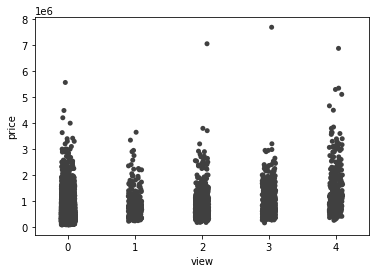

In [80]:
sns.stripplot(x="view", y="price", data=data, color=".25");

Similarly, let's calculate the correlation ratio between the dependent numerical variable *price* and the independent ordinal variable *condition* and compare the result with the Pearson correlation coefficient.

In [81]:
print('Correlation ratio, eta:',np.sqrt(eta2(data['condition'],data['price'])))
print('Pearson correlation:',np.array(data[['condition','price']].corr(method='pearson'))[0,1])
print('Spearman correlation:',np.array(data[['condition','price']].corr(method='spearman'))[0,1])

Correlation ratio, eta: 0.0829328979459151
Pearson correlation: 0.03636179126617329
Spearman correlation: 0.01849012528581666


We may create a scatter plot to visualize the association between the two variables.

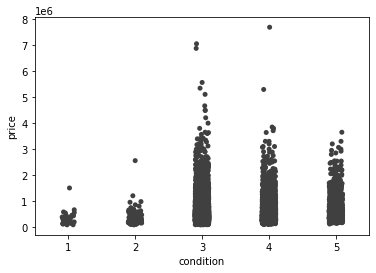

In [82]:
sns.stripplot(x="condition", y="price", data=data, color=".25");

Finally, let's calculate the correlation ratio between the dependent numerical variable *price* and the independent ordinal variable *grade* and compare the result with the Pearson correlation coefficient.

In [83]:
print('Correlation ratio, eta:',np.sqrt(eta2(data['grade'],data['price'])))
print('Pearson correlation:',np.array(data[['grade','price']].corr(method='pearson'))[0,1])
print('Spearman correlation:',np.array(data[['grade','price']].corr(method='spearman'))[0,1])

Correlation ratio, eta: 0.7208991698893609
Pearson correlation: 0.667434253205727
Spearman correlation: 0.658215188749712


We may create a scatter plot to visualize the association between the two variables.

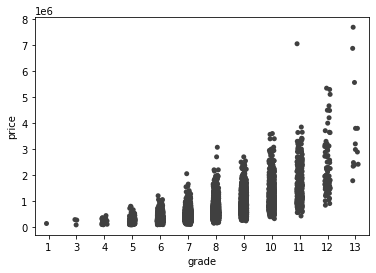

In [84]:
sns.stripplot(x="grade", y="price", data=data, color=".25");

As can be seen, eta is always slightly higher than the Pearson correlation coefficient. That indicates there is some nonlinearity in the relationship between the independent ordinal variables and the numerical dependent variable.

We may approximate the ordinal variables 'view', 'condition', and 'grade' as ratio variables, and then we can consider them as numerical variables to check the correlation ratio between them.

In [85]:
print("Eta correlation ratio between 'view' and 'condition':",np.sqrt(eta2(data['view'],data['condition'])))
print("Eta correlation ratio between 'view' and 'grade':",np.sqrt(eta2(data['view'],data['grade'])))
print("Eta correlation ratio between 'grade' and 'condition':",np.sqrt(eta2(data['grade'],data['condition'])))

Eta correlation ratio between 'view' and 'condition': 0.04923196033880743
Eta correlation ratio between 'view' and 'grade': 0.25196987512514146
Eta correlation ratio between 'grade' and 'condition': 0.16000267373567537


## 5. Nominal variables and one-hot encoding <a name="Nominal"></a>

The 'Credit' dataset contains information about balance, age, cards, education, income, limit, and rating for a number of potential customers.

Let's load the dataset into a *pandas* dataframe:

In [86]:
df=pd.read_csv('data\Credit.csv')
df

,Index,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


The Credit dataset records the following variables:

Numerical (quantitative) variables:
- Income (in thousands of dollars)
- Limit (credit limit)
- Rating (credit rating)
- Cards (number of credit cards)
- Age
- Education (years of education)
- Balance (average credit card debt for a number of individuals) 

In addition to these quantitative variables, we also have four qualitative variables: 
- Gender (Male or Female)
- Student (student status: Yes or No) 
- Married (marital status: Yes or No)
- Ethnicity (Caucasian, African American, or Asian)

While the qualitative variables gender, student, and status are binary variables, ethnicity is a nominal variable with three categories without intrinsic ordering.

As a first step, let's create the correlation coefficient matrix between numerical variables (input and output):

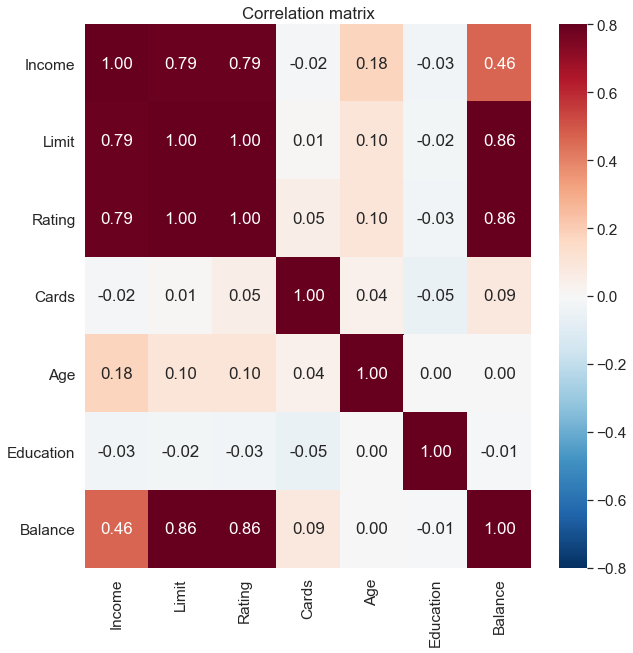

In [87]:
import seaborn as sns
corr_matrix=df[['Income','Limit','Rating','Cards','Age','Education','Balance']].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
hm=sns.heatmap(data=corr_matrix, vmin=-0.8,vmax=+0.8,fmt='1.2f',annot=True,cmap="RdBu_r")
hm.set_xticklabels(hm.get_xticklabels(), rotation = 90)
hm.set_yticklabels(hm.get_yticklabels(), rotation = 0)
plt.title('Correlation matrix')
plt.show()

As can be seen, the balance dependent variable has a high correlation with 'Limit' and 'Rating' and a moderate correlation with 'Income'. On the other hand, there is a high correlation between input variables 'Limit' and 'income', respective 'Rating' and 'Income', and at the same time a perfect correlation between 'Limit' and 'Rating'. The perfect correlation suggests that the limit for credit is defined on how the customer is rated based on other factors. We can check this assumption by fitting a linear regression model on credit limit vs. credit rating.

model = ols(formula = 'Limit ~ Rating', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

As can be seen with each unit increase in the rating, the credit limit increases by almost 15 units. The standard error of the regression coefficient is small, only 0.059. From this, we can infer that in our regression model, one of the two input variables shall be dropped.

Now, let's create a regression model using the *statsmodels* library where all the input variables are used, except for the 'Limit' and the nominal variable 'Ethnicity'.

In [88]:
model = ols(formula = 'Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married',data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     946.5
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          1.41e-250
Time:                        15:22:53   Log-Likelihood:                -2416.6
No. Observations:                 400   AIC:                             4851.
Df Residuals:                     391   BIC:                             4887.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -548.1031     33.649    -16.

As can be seen, the adjusted R-squared value is high, 0.95. However, according to the t-statistic, we cannot reject the null hypothesis that the regression coefficients for 'Gender' and 'Married' are significantly different from zero.

We can check how the binary variables (considered as dichotomous nominal variables) are correlated with the dependent variable 'Balance'.

In [89]:
print("Rank-biserial correlation between 'Gender' and 'Balance'",rankbiserialr(df['Gender'],df['Balance']))
print("Rank-biserial correlation between 'Married' and 'Balance'",rankbiserialr(df['Married'],df['Balance']))
print("Rank-biserial correlation between 'Student' and 'Balance'",rankbiserialr(df['Student'],df['Balance']))

Rank-biserial correlation between 'Gender' and 'Balance' 0.023253485519761766
Rank-biserial correlation between 'Married' and 'Balance' -0.002554312047399634
Rank-biserial correlation between 'Student' and 'Balance' 0.47166666666666657


As can be seen, except for the 'Student' binary variable, there is no correlation.

Let's create another model, at this time dropping all the input variables which do not have regression coefficients significantly different from zero:

In [90]:
model = ols(formula = 'Balance ~ Income + Rating + Age + Student',data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1892.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          4.17e-256
Time:                        15:22:53   Log-Likelihood:                -2418.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     395   BIC:                             4867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -547.3047     21.461    -25.

We can also create the dummy variables from the nominal variable 'Ethnicity'  using the *pandas* library.

In [91]:
pd.get_dummies(df,columns=['Ethnicity'])

,Index,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,Male,No,Yes,333,0,0,1
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,903,0,1,0
2,3,104.593,7075,514,4,71,11,Male,No,No,580,0,1,0
3,4,148.924,9504,681,3,36,11,Female,No,No,964,0,1,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,331,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,560,0,0,1
396,397,13.364,3838,296,5,65,17,Male,No,No,480,1,0,0
397,398,57.872,4171,321,5,67,12,Female,No,Yes,138,0,0,1
398,399,37.728,2525,192,1,44,13,Male,No,Yes,0,0,0,1


There is one problem, though. A nominal variable having *Ncat* categories when one-hot encoded into *Ncat* number of dummy variables, we introduce perfect multicollinearity between the dummy variables, and the design matrix will not be full rank.

For this reason, we should choose a baseline (typically, the first category in the alphabetical order) for which a dummy variable is not created.

In [92]:
pd.get_dummies(df,columns=['Ethnicity'],drop_first=True)

,Index,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,Male,No,Yes,333,0,1
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,903,1,0
2,3,104.593,7075,514,4,71,11,Male,No,No,580,1,0
3,4,148.924,9504,681,3,36,11,Female,No,No,964,1,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,331,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,560,0,1
396,397,13.364,3838,296,5,65,17,Male,No,No,480,0,0
397,398,57.872,4171,321,5,67,12,Female,No,Yes,138,0,1
398,399,37.728,2525,192,1,44,13,Male,No,Yes,0,0,1


Now create another model, at this time using the 'Ethnicity' nominal variable (*statsmodels* automatically will create the dummy variables in the background).

In [93]:
model = ols(formula = 'Balance ~ Income + Rating + Age + Student + Ethnicity', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1261.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          3.35e-253
Time:                        15:22:53   Log-Likelihood:                -2417.7
No. Observations:                 400   AIC:                             4849.
Df Residuals:                     393   BIC:                             4877.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -558

According to the t-statistic, we cannot reject the null hypothesis that the regression coefficients for the dummy variables created from Ethnicity are significantly different from zero.

Let's check the eta correlation ratio between the nominal variable and dependent variable.

In [94]:
np.sqrt(eta2(df['Ethnicity'],df['Balance']))

0.014792141259755354

That is close to zero. We may plot the balance vs. income with different colors for ethnicity to see that there is no difference among ethnic groups.

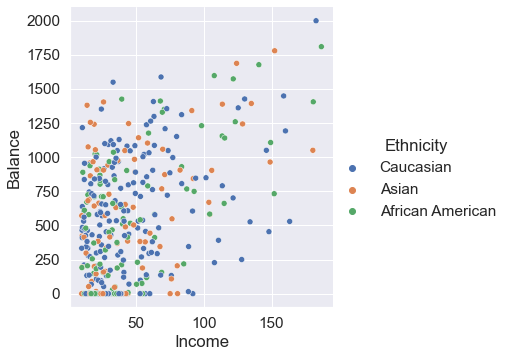

In [95]:
sns.relplot(x="Income", y="Balance", hue="Ethnicity", data=df);

Finally, let's fit a linear model using only those input variables that are relevant.

In [96]:
model = ols(formula = 'Balance ~ Income + Rating + Age + Student', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1892.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          4.17e-256
Time:                        15:22:54   Log-Likelihood:                -2418.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     395   BIC:                             4867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -547.3047     21.461    -25.

We may create another scatter plot (credit balance vs. credit rating) to see the distinction among student vs. non-student groups.

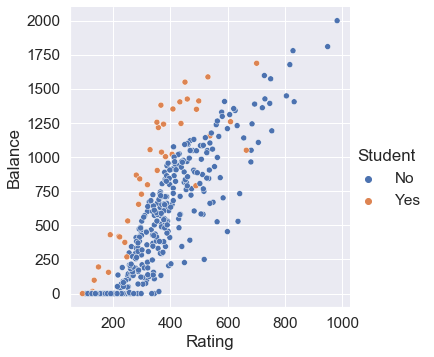

In [97]:
sns.relplot(x="Rating", y="Balance", hue="Student", data=df);

## 6. Scikit-learn OneHotEncoder, ColumnTransformer, and Pipeline <a name="OneHot"></a>

Just as in the case of a binary and ordinal variable, we can use the *scikit-learn* library for converting to 'Ethnicity' nominal variable into dummy variables. For this purpose, we should use the *OneHotEncoder* of the *scikit-learn* library.

In [98]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(drop=None,sparse=False)
Xdummy=onehotencoder.fit_transform(np.array(df['Ethnicity']).reshape(-1,1))
Xdummy

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

We may find the categories of the nominal variables in the *categories_* attribute of the *OneHotEncoder* class.

In [99]:
onehotencoder.categories_

[array(['African American', 'Asian', 'Caucasian'], dtype=object)]

We may check the names of the created dummy variables:

In [100]:
onehotencoder.get_feature_names()

array(['x0_African American', 'x0_Asian', 'x0_Caucasian'], dtype=object)

We may use the inverse_transform to transform back the dummy variables into the nominal variables with original categories.

In [101]:
onehotencoder.inverse_transform(Xdummy)

array([['Caucasian'],
       ['Asian'],
       ['Asian'],
       ['Asian'],
       ['Caucasian'],
       ['Caucasian'],
       ['African American'],
       ['Asian'],
       ['Caucasian'],
       ['African American'],
       ['Caucasian'],
       ['Caucasian'],
       ['Asian'],
       ['Caucasian'],
       ['African American'],
       ['African American'],
       ['African American'],
       ['Asian'],
       ['Asian'],
       ['Asian'],
       ['Asian'],
       ['Caucasian'],
       ['African American'],
       ['African American'],
       ['Caucasian'],
       ['African American'],
       ['Caucasian'],
       ['African American'],
       ['African American'],
       ['Caucasian'],
       ['Caucasian'],
       ['Asian'],
       ['Caucasian'],
       ['Caucasian'],
       ['Asian'],
       ['Caucasian'],
       ['Caucasian'],
       ['Caucasian'],
       ['Caucasian'],
       ['Caucasian'],
       ['African American'],
       ['African American'],
       ['Asian'],
       ['Asian'],


In the previous example, we converted all three categories of 'Ethnicity' into a dummy variable. As we stated earlier, that creates a serious multicollinearity issue. In fact, the inverse of the cross-product $\mathbf {\dot X}^\top\mathbf {\dot X}$ does not exist when the design matrix has no full rank. For this reason, we should decide which category would represent the baseline. One option would be to take the first category for baseline.

In [102]:
onehotencoder=OneHotEncoder(drop='first',sparse=False)
onehotencoder.fit_transform(np.array(df['Ethnicity']).reshape(-1,1))

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

Because now we have three types of variables among inputs, we may create another column transformer. But at this time, we will have the *NoTransformer* for the numerical variables, *OrdinalEncoder* for the binary variables, and *OneHotEncoder* for the nominal variable with more than two categories.

In [103]:
ct = ColumnTransformer(transformers=[('notransf',notransf,['Income','Limit','Rating','Cards','Age','Education']),\
                                     ('binarizer',encoder,['Gender','Student','Married']),\
                                     ('onehot',onehotencoder,['Ethnicity'])])
ct

ColumnTransformer(transformers=[('notransf', NoTransformer(),
                                 ['Income', 'Limit', 'Rating', 'Cards', 'Age',
                                  'Education']),
                                ('binarizer', OrdinalEncoder(),
                                 ['Gender', 'Student', 'Married']),
                                ('onehot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Ethnicity'])])

Then we can transform all the input data into the input matrix with a single line of code.

In [104]:
ct.fit_transform(df)

array([[1.48910e+01, 3.60600e+03, 2.83000e+02, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 4.83000e+02, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.04593e+02, 7.07500e+03, 5.14000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 3.21000e+02, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.92000e+02, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 4.15000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

We may check the collection of fitted transformers as tuples of (name, fitted_transformer, column).

In [105]:
ct.transformers_

[('notransf',
  NoTransformer(),
  ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']),
 ('binarizer', OrdinalEncoder(), ['Gender', 'Student', 'Married']),
 ('onehot', OneHotEncoder(drop='first', sparse=False), ['Ethnicity']),
 ('remainder', 'drop', [0, 11])]

As a next step, we can create a pipeline that transforms the data first, then fits a linear regression model.

In [106]:
pipe=Pipeline(steps=[('preproc',ct),('regr',linregr)])
pipe.fit(df,df['Balance'])

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('notransf', NoTransformer(),
                                                  ['Income', 'Limit', 'Rating',
                                                   'Cards', 'Age',
                                                   'Education']),
                                                 ('binarizer', OrdinalEncoder(),
                                                  ['Gender', 'Student',
                                                   'Married']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Ethnicity'])])),
                ('regr', LinearRegression())])

We can obtain the regression coefficients of the linear regression in the following way:

In [107]:
pipe['regr'].intercept_
pipe['regr'].coef_

array([-7.80310179e+00,  1.90906737e-01,  1.13652652e+00,  1.77244836e+01,
       -6.13908824e-01, -1.09885532e+00,  1.06532477e+01,  4.25747360e+02,
       -8.53390061e+00,  1.68041792e+01,  1.01070252e+01])

Last, using a single line of code, we can make predictions. The pipeline in the background takes care of first converting the data with column transformer. This will be done for input data that was not seen during linear regression model fit, too.

In [108]:
pipe.predict(df)

array([ 418.70462475,  920.70033031,  671.50928205,  972.21144843,
        403.04406328, 1100.79496177,  287.00542902,  892.55372678,
        368.35159726, 1239.80862701, 1286.12935072, -183.0775179 ,
        325.51841169, 1061.48490394,  269.87669465,   55.89110378,
        107.12610578,  449.03025694,  850.16723657, 1017.14111547,
        216.54515441,  921.79048725,  104.48470831,  504.05653139,
        -49.15591928,  643.14976126,  701.22946803,  499.79478549,
       1679.56225752,  868.86270672,  832.91147582,  108.29417565,
        601.10556988, -147.61680388,   97.20193645,  512.07176353,
        754.27541737, 1023.10570956,  558.07330772,  403.30778911,
        164.74679954, 1103.16696769,  462.69525664,  918.11286976,
       1033.402815  , 1003.17378945, 1160.40790512,  798.21617654,
       -109.77474344,  899.84908065,  651.93452243,  299.13571875,
        648.8372846 ,  934.11371551, -161.5203853 , -232.62962546,
        456.71285568,  261.60444168,  399.08614605,  571.87980

### Changing the baseline

So far, so good! But until now we dropped always the first category in alphabetical order. So the question is, what happens if we drop another category (i.e., we use a category that is not the first in alphabetical order).

As a first step, let's use the first category (African America) for reference level.

**Note:** *It should be possible to define the baseline (reference level) directly in statsmodels formula, like "C(Ethnicity, Treatment(reference='Asian'))", when patsy is not broken.*

In [109]:
onehotencoder=OneHotEncoder(drop=['African American'],sparse=False)
dummy2=onehotencoder.fit_transform(np.array(df['Ethnicity']).reshape(-1,1))
df2=pd.concat([df,pd.DataFrame(dummy2,columns=['Asian','Caucasian'])],axis=1)
model = ols(formula = 'Balance ~ Income + Asian + Caucasian', data=df2).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     36.16
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.13e-20
Time:                        15:22:55   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5950.
Df Residuals:                     396   BIC:                             5966.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    242.4882     49.567      4.892      0.0

Then use the next category (Asian) as reference level.

In [110]:
onehotencoder=OneHotEncoder(drop=['Asian'],sparse=False)
dummy2=onehotencoder.fit_transform(np.array(df['Ethnicity']).reshape(-1,1))
df2=pd.concat([df,pd.DataFrame(dummy2,columns=['AfricanAmerican','Caucasian'])],axis=1)
model = ols(formula = 'Balance ~ Income + AfricanAmerican + Caucasian', data=df2).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     36.16
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.13e-20
Time:                        15:22:55   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5950.
Df Residuals:                     396   BIC:                             5966.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         244.9448     47.946     

Finally, use the last category (Caucasian) for reference level.

In [111]:
onehotencoder=OneHotEncoder(drop=['Caucasian'],sparse=False)
dummy2=onehotencoder.fit_transform(np.array(df['Ethnicity']).reshape(-1,1))
df2=pd.concat([df,pd.DataFrame(dummy2,columns=['AfricanAmerican','Asian'])],axis=1)
model = ols(formula = 'Balance ~ Income + AfricanAmerican + Asian', data=df2).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     36.16
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.13e-20
Time:                        15:22:56   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5950.
Df Residuals:                     396   BIC:                             5966.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         249.1069     38.857     

As can be seen, the regression coefficient and standard error of the Income it is not affected by the reference level chosen.

## 7. Interaction between numerical and categorical variable <a name="Interaction"></a>

In lab exercise 3.2 we considered an interaction between TV and radio, both of which are quantitative variables. However, the concept of interactions applies just as well to qualitative variables or a combination of quantitative and qualitative variables.

Let's suppose that we wish to predict the credit balance using the income (quantitative) and student (qualitative) variables. In the absence of an interaction term we have the following OLS result:

In [112]:
model = ols(formula = 'Balance ~ Income + Student', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           9.64e-29
Time:                        15:22:56   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        211.1430     32.457      6.

When using only the 'Income' and 'Student' as input variables for fitting the regression model, two parallel lines are obtained.

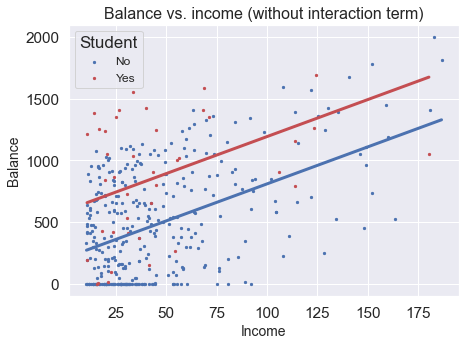

In [113]:
X=np.array(pd.get_dummies(df,columns=['Student'])[['Income','Student_Yes']])
y_=np.array(df['Balance'])
linregr=LinearRegression()
linregr.fit(X,y_)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
x_min=X[np.where(X[:,1]==0)[0],0].min()
x_max=X[np.where(X[:,1]==0)[0],0].max()
df[df['Student']=='No'].plot.scatter(x='Income',y='Balance',c='b',ax=ax,label='No',s=5)
df[df['Student']=='Yes'].plot.scatter(x='Income',y='Balance',c='r',ax=ax,label='Yes',s=5)
ax.plot([x_min,x_max],linregr.predict(np.array([[x_min,0],[x_max,0]])),c='b',lw=3)
x_min=X[np.where(X[:,1]==1)[0],0].min()
x_max=X[np.where(X[:,1]==1)[0],0].max()
ax.plot([x_min,x_max],linregr.predict(np.array([[x_min,1],[x_max,1]])),c='r',lw=3)
plt.xlabel("Income",fontsize=14)
plt.ylabel("Balance",fontsize=14)
plt.title("Balance vs. income (without interaction term)",fontsize=16)
plt.legend(title='Student',fontsize=12)
plt.show()

The fact that the lines are parallel means that the average effect on the balance of a one-unit increase in income does not depend on whether or not the individual is a student. This represents a potentially serious limitation of the model since in fact, a change in income may have a very different effect on the credit card balance of a student versus a non-student.

This limitation can be addressed by adding an interaction variable, created by multiplying income with the dummy variable for students.

The *statsmodels* library takes care of creating this interaction term when the formula is applied (patsy is doing this in the background).

In [114]:
model = ols(formula = 'Balance ~ Income*Student', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           4.94e-28
Time:                        15:22:56   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.62

Let's make a plot using Income, Student, and their interaction terms for comparison.

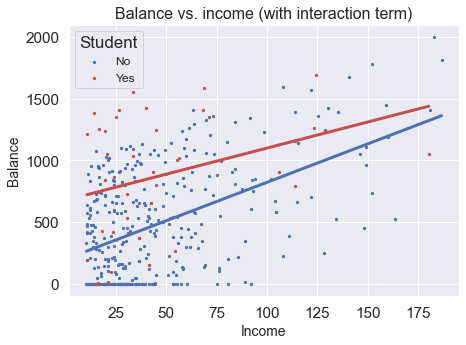

In [115]:
X=np.append(X,X.cumprod(axis=1)[:,1][:,np.newaxis],axis=1)
linregr.fit(X,y_)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
x_min=X[np.where(X[:,1]==0)[0],0].min()
x_max=X[np.where(X[:,1]==0)[0],0].max()
df[df['Student']=='No'].plot.scatter(x='Income',y='Balance',c='b',ax=ax,label='No',s=5)
df[df['Student']=='Yes'].plot.scatter(x='Income',y='Balance',c='r',ax=ax,label='Yes',s=5)
ax.plot([x_min,x_max],linregr.predict(np.array([[x_min,0,0],[x_max,0,0]])),c='b',lw=3)
x_min=X[np.where(X[:,1]==1)[0],0].min()
x_max=X[np.where(X[:,1]==1)[0],0].max()
ax.plot([x_min,x_max],linregr.predict(np.array([[x_min,1,x_min],[x_max,1,x_max]])),c='r',lw=3)
plt.xlabel("Income",fontsize=14)
plt.ylabel("Balance",fontsize=14)
plt.title("Balance vs. income (with interaction term)",fontsize=16)
plt.legend(title='Student',fontsize=12)
plt.show()

Once again, we have two different regression lines for the students and the non-students. But now, those regression lines have different intercepts, as well as different slopes. This allows for the possibility that changes in income may affect the credit card balances of students and non-students differently. We note that the slope for students is lower than the slope for non-students. That suggests that increases in income are associated with smaller increases in credit card balance among
students as compared to non-students.

However, in the above model, the interaction term has a high p-value.
So, we might try to use only the interaction term:

In [116]:
model = ols(formula = 'Balance ~ Income:Student', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     63.35
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.32e-24
Time:                        15:22:57   Log-Likelihood:                -2964.0
No. Observations:                 400   AIC:                             5934.
Df Residuals:                     397   BIC:                             5946.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             250.3334    

Now, the interaction terms have very low p-values. 

Let's create another model, at this time including both the Income and the interaction term but not the Student.

In [117]:
model = ols(formula = 'Balance ~ Income + Income:Student', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     63.35
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.32e-24
Time:                        15:22:57   Log-Likelihood:                -2964.0
No. Observations:                 400   AIC:                             5934.
Df Residuals:                     397   BIC:                             5946.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               250.33

As can be seen, the results are the same, except that now the coefficient of the interaction term is the difference of the previous two coefficients.

A similar approach can be done with Rating and Student variables, by including their interaction in our model. First, just use the additive model.

In [118]:
model = ols(formula = 'Balance ~ Rating + Student', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     867.8
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          1.17e-145
Time:                        15:22:57   Log-Likelihood:                -2683.1
No. Observations:                 400   AIC:                             5372.
Df Residuals:                     397   BIC:                             5384.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -431.3178     25.135    -17.

Now, add the interaction term:

In [119]:
model = ols(formula = 'Balance ~ Rating*Student', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     579.3
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          2.13e-144
Time:                        15:22:57   Log-Likelihood:                -2682.5
No. Observations:                 400   AIC:                             5373.
Df Residuals:                     396   BIC:                             5389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -423.37

And create the plot of the two lines.

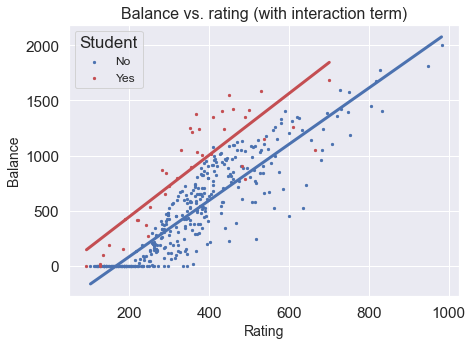

In [120]:
X=np.array(pd.get_dummies(df,columns=['Student'])[['Rating','Student_Yes']])
X=np.append(X,X.cumprod(axis=1)[:,1][:,np.newaxis],axis=1)
y_=np.array(df['Balance'])
linregr=LinearRegression()
linregr.fit(X,y_)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
x_min=X[np.where(X[:,1]==0)[0],0].min()
x_max=X[np.where(X[:,1]==0)[0],0].max()
df[df['Student']=='No'].plot.scatter(x='Rating',y='Balance',c='b',ax=ax,label='No',s=5)
df[df['Student']=='Yes'].plot.scatter(x='Rating',y='Balance',c='r',ax=ax,label='Yes',s=5)
ax.plot([x_min,x_max],linregr.predict(np.array([[x_min,0,0],[x_max,0,0]])),c='b',lw=3)
x_min=X[np.where(X[:,1]==1)[0],0].min()
x_max=X[np.where(X[:,1]==1)[0],0].max()
ax.plot([x_min,x_max],linregr.predict(np.array([[x_min,1,x_min],[x_max,1,x_max]])),c='r',lw=3)
plt.xlabel("Rating",fontsize=14)
plt.ylabel("Balance",fontsize=14)
plt.title("Balance vs. rating (with interaction term)",fontsize=16)
plt.legend(title='Student',fontsize=12)
plt.show()

The lines are not parallel anymore, although the slope difference is not so obvious as with income.

Again, the interaction term has a high p-value, so let's create a model with only rated and the interaction term without the Student.

In [121]:
model = ols(formula = 'Balance ~ Rating + Rating:Student', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     836.6
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          4.29e-143
Time:                        15:22:57   Log-Likelihood:                -2689.1
No. Observations:                 400   AIC:                             5384.
Df Residuals:                     397   BIC:                             5396.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -394.44

Now, the p-value for the interaction term is low.

Finally, we can create a model where all three variables 'Income', 'Rating', and 'Student' are included, as well as their interaction terms.

In [122]:
model = ols(formula = 'Balance ~ Income + Rating*Student + Income:Student + Income:Rating', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1458.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          5.04e-265
Time:                        15:22:57   Log-Likelihood:                -2390.0
No. Observations:                 400   AIC:                             4794.
Df Residuals:                     393   BIC:                             4822.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -471.16

As can be seen from the OLS results, all the p-values are very low. Moreover, the adjusted R-square value and the RMSE are slightly improved compared to our initial modal.

So far, so good! However, the condition number is very high, so let's check the VIF values.

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix
Xdot=np.asarray(dmatrix('Income + Rating*Student + Income:Student + Income:Rating',df))

print("VIF for 'Student[T.Yes]':",variance_inflation_factor(Xdot,1))
print("VIF for 'Income':",variance_inflation_factor(Xdot,2))
print("VIF for 'Income:Student[T.Yes]':",variance_inflation_factor(Xdot,3))
print("VIF for 'Rating':",variance_inflation_factor(Xdot,4))
print("VIF for 'Rating:Student[T.Yes]':",variance_inflation_factor(Xdot,5))
print("VIF for 'Rating:Income':",variance_inflation_factor(Xdot,6))

VIF for 'Student[T.Yes]': 7.700032452072276
VIF for 'Income': 11.847729689054937
VIF for 'Income:Student[T.Yes]': 6.804186088751386
VIF for 'Rating': 4.124984655648789
VIF for 'Rating:Student[T.Yes]': 17.189856213145767
VIF for 'Rating:Income': 15.70443687878535


In order to decrease the VIF values and thus the multicollinearity problem, let's center the numerical variables before creating the interaction terms.

In [124]:
df[['Income','Rating']]=df[['Income','Rating']]-df[['Income','Rating']].mean()
model = ols(formula = 'Balance ~ Income + Rating*Student + Income:Student + Income:Rating', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1458.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          5.04e-265
Time:                        15:22:57   Log-Likelihood:                -2390.0
No. Observations:                 400   AIC:                             4794.
Df Residuals:                     393   BIC:                             4822.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               460.21

The condition number is decreased with one order, and the standard error for Student and Income decreased (their coefficients also changed - this is because, with high multicollinearity, the results are unreliable). 

Let's check again the VIF values. 

In [125]:
Xdot=np.asarray(dmatrix('Income + Rating*Student + Income:Student + Income:Rating',df))
print("VIF for 'Student[T.Yes]':",variance_inflation_factor(Xdot,1))
print("VIF for 'Income':",variance_inflation_factor(Xdot,2))
print("VIF for 'Income:Student[T.Yes]':",variance_inflation_factor(Xdot,3))
print("VIF for 'Rating':",variance_inflation_factor(Xdot,4))
print("VIF for 'Rating:Student[T.Yes]':",variance_inflation_factor(Xdot,5))
print("VIF for 'Rating:Income':",variance_inflation_factor(Xdot,6))

VIF for 'Student[T.Yes]': 1.0084360218682598
VIF for 'Income': 4.31696059559718
VIF for 'Income:Student[T.Yes]': 2.855226303988724
VIF for 'Rating': 2.983991422574474
VIF for 'Rating:Student[T.Yes]': 2.7758257044059196
VIF for 'Rating:Income': 2.2588281951958162


Now, all the VIF values are at reasonable levels, so we can rely now on the OLS results.

## 8. Case study: Salary discrimination <a name="Salary"></a>

The following dataset is a result of a study of faculty salaries in a small college in the Midwest conducted in the 1970s, consisting of observations on six variables for 52 tenure-track professors. Let's load the dataset and analyze whether there is salary discrimination between genders.

In [126]:
salary=pd.read_csv(os.path.join('data','SalaryDiscrimination.csv'), sep=' ')
salary

,sex,rank,years,degree,yearDegree,salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696
5,male,full,16,doctorate,21,28516
6,female,full,0,masters,32,24900
7,male,full,16,doctorate,18,31909
8,male,full,13,masters,30,31850
9,male,full,13,masters,31,32850


The numerical variables are:

years = the number of years employed at this college (*)<br>
yearDegree = number of years since the highest degree was earned<br>
salary = academic year salary, in US dollars.

The categorical variables are:

sex
- male
- female

rank 
- assistant (professor)
- associate (professor) 
- full (professor)

degree (highest)
- masters
- doctorate

(*) - this definition comes from Sanford Weisberg's Applied Linear Regression book

The dataset is small, so we can check visually that there are no missing values. <br>
Let's check the unique values of each categorical variable:

In [127]:
print("Unique values for 'sex' categorical variable:",salary['sex'].unique())
print("Unique values for 'rank' categorical variable:",salary['rank'].unique())
print("Unique values for 'degree' categorical variable:",salary['degree'].unique())

Unique values for 'sex' categorical variable: ['male' 'female']
Unique values for 'rank' categorical variable: ['full' 'associate' 'assistant']
Unique values for 'degree' categorical variable: ['doctorate' 'masters']


Because we are looking for discrimination between genders, let's see what is the percentage of females among professors:

In [128]:
print("Percentage of females: {:1.2f}%".format((salary['sex']=='female').mean()*100))

Percentage of females: 26.92%


We can see that females are underrepresented among professors in collage.<br>

### Correlation analysis

Let's check the Pearson correlation coefficient between the numerical variables.

In [129]:
salary[['salary','years','yearDegree']].corr()

,salary,years,yearDegree
salary,1.000000,0.700669,0.674854
years,0.700669,1.000000,0.638776
yearDegree,0.674854,0.638776,1.000000


From the correlation matrix, results are obvious that the dependent variable 'salary' has a high correlation with both independent numerical variables: 'years' and 'yearDegree'. On the other hand, there is high correlation between the two numerical input variables. <br>
Because both the point-biserial correlation coefficient and phy coefficient are a special case of Pearson correlation coefficient, let's encode the binary variables then create another correlation matrix.

In [130]:
salary['degreeC']=(salary['degree']=='masters').astype(int)
salary['sexC']=(salary['sex']=='male').astype(int)
salary[['salary','years','yearDegree','degreeC','sexC']].corr()

,salary,years,yearDegree,degreeC,sexC
salary,1.000000,0.700669,0.674854,0.069726,0.252782
years,0.700669,1.000000,0.638776,0.143377,0.379404
yearDegree,0.674854,0.638776,1.000000,0.482836,0.088288
degreeC,0.069726,0.143377,0.482836,1.000000,0.077112
sexC,0.252782,0.379404,0.088288,0.077112,1.000000


From the correlation matrix, we can see that the salary does not correlate with the degree and has a very low correlation with sex.<br>
Let's create the contingency table between nominal variables 'rank', 'sex', and 'degree'.

In [131]:
pd.crosstab(salary['rank'],salary['sex'],margins=True)

sex,female,male,All
rank,,,
assistant,8,10,18
associate,2,12,14
full,4,16,20
All,14,38,52


Similarly we have:

In [132]:
pd.crosstab(salary['rank'],salary['degree'],margins=True)

degree,doctorate,masters,All
rank,,,
assistant,14,4,18
associate,5,9,14
full,15,5,20
All,34,18,52


From the contingency table, we can easily calculate Goodman and Kruskal’s lambda correlation measure. However, lambda is asymmetric, so we have to make a distinction between which one is the dependent and which one is the independent variable.<br>
Let's define Goodman and Kruskal’s lambda function using the formula from the book, which takes two input nominal variables $(x,y)$, and returns a tuple of $(\lambda_{y|x},\lambda_{x|y})$:

In [133]:
def Lambda(x,y):
    C=np.array(pd.crosstab(x,y)) # Return the following tuple: Lambda_y|x, Lambda_x|y
    return ((np.sum(np.max(C,axis=0))-np.max(np.sum(C,axis=0)))/(np.sum(C)-np.max(np.sum(C,axis=0))),\
            (np.sum(np.max(C,axis=1))-np.max(np.sum(C,axis=1)))/(np.sum(C)-np.max(np.sum(C,axis=1))))

Then, using this function we can calculate the asymmetric lambda correlation measures:

In [134]:
Lambda(x=salary['rank'],y=salary['sex'])

(-1.0, 0.5625)

And similarly we have

In [135]:
Lambda(x=salary['rank'],y=salary['degree'])

(-0.5555555555555556, 0.5625)

A symmetric version of Goodman and Kruskal’s lambda correlation measure can be also calculated using the formula from the book.

In [136]:
def LambdaSym(x,y):
    C=np.array(pd.crosstab(x,y))
    return (np.sum(np.max(C,axis=0))+np.sum(np.max(C,axis=1))-np.max(np.sum(C,axis=0))-np.max(np.sum(C,axis=1)))\
           /(2*np.sum(C)-np.max(np.sum(C,axis=0))-np.max(np.sum(C,axis=1)))

Then, using this function we can calculate the asymmetric lambda correlation measures:

In [137]:
LambdaSym(x=salary['rank'],y=salary['sex'])

0.08695652173913043

and similarly we obtain:

In [138]:
LambdaSym(x=salary['rank'],y=salary['degree'])

0.16

From the symmetric lambda correlation measures, we can conclude that there is no correlation among the nominal variables.<br>
Now, let's use the eta correlation ratio to see how the nominal variable correlates with the numerical dependent variable.

In [139]:
print('Correlation ratio, eta:',np.sqrt(eta2(salary['rank'],salary['salary'])))

Correlation ratio, eta: 0.8684424857852822


We can conclude that the dependent variable 'salary' is highly correlated with the numerical variable 'years' and 'yearDegree', respective with the nominal variable 'rank'. On the other hand, the correlation between the two numerical independent variables is also high.

### Model building

Let's create an MLR model using all variables with *statsmodels* library:

In [140]:
model = ols(formula = 'salary ~ years + rank + yearDegree + degree + sex', data=salary).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     44.24
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.87e-17
Time:                        15:22:58   Log-Likelihood:                -474.72
No. Observations:                  52   AIC:                             963.4
Df Residuals:                      45   BIC:                             977.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.691e+04    816.44

As can be seen, for variables 'Degree', 'Sex', and 'YearDegree', we cannot reject the null hypothesis, so their regression coefficients statistically are not different from zero.

Now let's fit another linear model, at this time using only the 'years' and 'rank' input variables in the model.

In [141]:
model = ols(formula = 'salary ~ years + rank', data=salary).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     87.15
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.95e-19
Time:                        15:22:58   Log-Likelihood:                -476.48
No. Observations:                  52   AIC:                             961.0
Df Residuals:                      48   BIC:                             968.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           1.62e+04    638.67

We obtained a model with approximately the same goodness of fit. Based on our analysis, we can conclude that there is no statistical evidence that salary discrimination is present between genders.

### Stratification

Let's create a category plot for the salary between the genders.

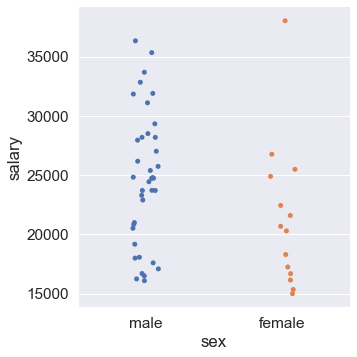

In [142]:
sns.catplot(x="sex", y='salary',data=salary);

From the above plot, we have the feeling that some sort of salary discrimination should be present between genders (although there is an outlier among females, which sets the highest record on the salaries). If our linear regression model did not capture that, then what would be the explanation for this?

Let's create a box plot of the salaries differentiated between degree and sex.

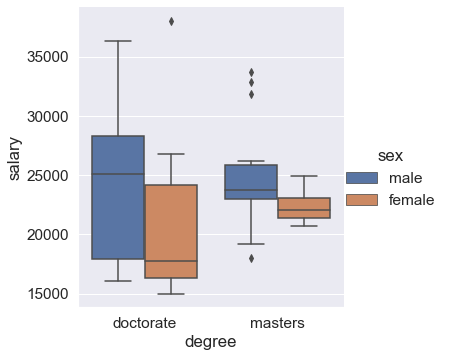

In [143]:
sns.catplot(x="degree", y='salary', hue="sex", kind="box", data=salary);

From the above box plot, we can observe that the median of the salaries is lower for females than males in both groups: professors with a master's degree and with a doctorate.

We can create a similar box plot, at this time, the differentiation of salaries should be made among the ranks for both males and females.

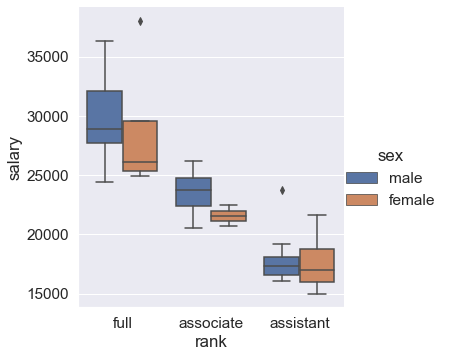

In [144]:
sns.catplot(x="rank", y='salary', hue="sex", kind="box", data=salary);

From the above plot, a similar observation can be made: the median salary for females is lower than for males among full and associate professors.

Because the 'salary' is highly correlated with 'years' and 'rank', let's analyze if the 'years' is correlated with 'sex'? First, we should check this visually.

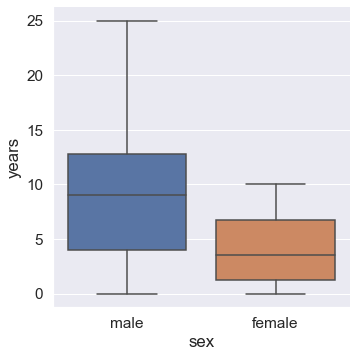

In [145]:
sns.catplot(x="sex", y='years', kind="box", data=salary);

Now, that we see that males in general have a higher number of 'years' let's try to formalize this correlation with a linear regression model.

In [146]:
model = ols(formula = 'years ~ sex', data=salary).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  years   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     8.408
Date:                Mon, 22 Feb 2021   Prob (F-statistic):            0.00554
Time:                        15:23:00   Log-Likelihood:                -157.96
No. Observations:                  52   AIC:                             319.9
Df Residuals:                      50   BIC:                             323.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0714      1.375      2.960      

And indeed, the p-value of 'sex' is very low, which suggests that there is statistical evidence in the number of 'years' between the genders.

Because the 'salary' is also highly correlated with 'rank', let's create a percentage bar plot separately for males and females to see the distribution of ranks within each subgroup for the master's degree, respective doctorate.

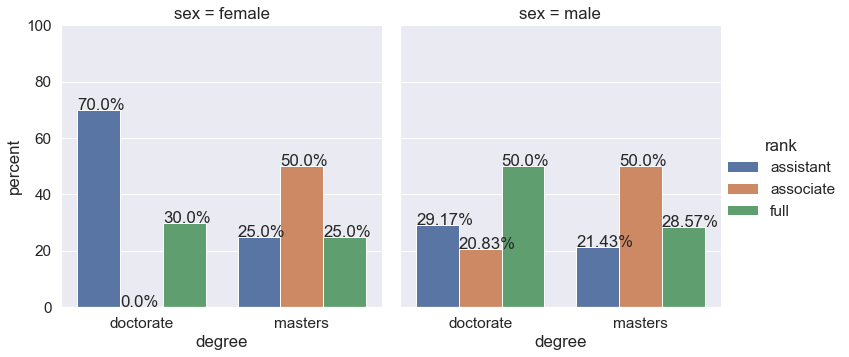

In [147]:
df=salary.groupby(['sex','degree'])['rank'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g=(sns.catplot(data=df,x='degree',y='percent',hue='rank',col='sex',hue_order=['assistant','associate','full'],kind='bar'))
g.axes[0,0].set_ylim(0,100)
for p in g.axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    if txt=='nan%':
        txt='0.0%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    if np.isnan(txt_y):
        txt_y=0
    g.axes[0,0].text(txt_x,txt_y,txt)
for p in g.axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes[0,1].text(txt_x,txt_y,txt)

As can be seen, while in the case of a master's degree, the distribution of ranks among males and females is around the same, in the case of a doctorate, females are underrepresented in associate and full professors.

### Conclusion

We conclude that, although there is no statistical evidence of salary discrimination between genders, there are latent discriminations, some inherited from the past, some were still present when the dataset was recorded. These are:
1. Females were still underrepresented among professors during the 1970s
2. Females, on average, had a lower number of years than males which was a direct consequence of lower salary for females (that could the result of a legacy of no females among professors in the past)
3. Even during the 1970s, in the promotion to associate or full professor, females were discriminated against negatively.

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).